In [ ]:
import pandas as pd

Read in data

In [ ]:
df = pd.read_csv('./data/twitter/20220501_20220809/tweets_sentiments.csv', encoding='utf-8')

In [ ]:
df.head(2)

In [ ]:
df['sentiment'].value_counts()

In [ ]:
df['party_candidate'].value_counts()

In [ ]:
df['query'].value_counts()

In [ ]:
df['in_nigeria'].value_counts()

More tweets come from outside Nigeria (diaspora) than withtin. Assign state as diaspora

In [ ]:
#diaspora['state'].value_counts().head(30)

In [ ]:
# df['state'] = df['state'].str.replace(".", "")
# df['state'] = df['state'].str.replace("-", "")
# df['state'] = df['state'].str.replace("_", "")
# df['state'] = df['state'].str.replace("&", "")
# df['state'] = df['state'].str.replace("/", "")
# df['state'] = df['state'].str.replace("earth", "")
# df['state'] = df['state'].fillna('unknown')
# df.loc[df['state'].str.contains('abuja'),'state'] = 'abuja'
# df.loc[df['state'].str.contains('federal'),'state'] = 'abuja'
# df.loc[df['state'].str.contains('abuja'),'lagos'] = 'lagos'

In [ ]:
def clean_states(x, nigerian_states):
    '''
    
    '''
    
    for s in nigerian_states:
        if x == s:
            return x
        
    return 'unknown'    

In [ ]:
nigerian_states = ['abia',
 'adamawa',
 'akwaibom',
 'anambra',
 'bauchi',
 'bayelsa',
 'benue',
 'borno',
 'crossriver',
 'delta',
 'ebonyi',
 'edo',
 'ekiti',
 'enugu',
 'gombe',
 'imo',
 'jigawa',
 'kaduna',
 'kano',
 'katsina',
 'kebbi',
 'kogi',
 'kwara',
 'lagos',
 'nasarawa',
 'niger',
 'ogun',
 'ondo',
 'osun',
 'oyo',
 'plateau',
 'rivers',
 'sokoto',
 'taraba',
 'yobe',
 'zamfara',
 'abuja']

In [ ]:
df['state'] = df['state'].apply(lambda x: clean_states(x, nigerian_states))

In [ ]:
nigeria = df[df['state'] != 'unknown']

In [ ]:
df['state'].value_counts()#.head(6)

In [ ]:
nigeria['state'].value_counts().head(6)

In [ ]:
#test = df.groupby(['party_candidate', 'state', 'sentiment']).agg({'tweet_proc': 'count'}).unstack()
test = nigeria.groupby(['state', 'sentiment']).agg({'tweet_proc': 'count'}).unstack()
test_all = df.groupby(['state', 'sentiment']).agg({'tweet_proc': 'count'}).unstack()

In [ ]:
test.columns = test.columns.get_level_values(1)
test_all.columns = test_all.columns.get_level_values(1)

In [ ]:
test['total_tweets']= test.sum(axis=1)
test = test.fillna(0)

test_all['total_tweets']= test_all.sum(axis=1)
test_all = test_all.fillna(0)

In [ ]:
test.head()

multi-index slicing
https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe

Only show top five

In [ ]:
top_n = 5

In [ ]:
# atiku_pdp = test.loc['atiku_pdp'].sort_values(by='total_tweets', ascending=False).head(top_n)
# obi_labour = test.loc['obi_labour'].sort_values(by='total_tweets', ascending=False).head(top_n)
# tinubu_apc = test.loc['tinubu_apc'].sort_values(by='total_tweets', ascending=False).head(top_n)

In [ ]:
test.columns

In [ ]:
obi_labour = test.sort_values(by='total_tweets', ascending=False).head(top_n+1)
obi_labour_all = test_all.sort_values(by='total_tweets', ascending=False)

In [ ]:
obi_labour

<hr>
<h1>Plots</h1>

In [ ]:
queries = df['query'].unique()
title = "Search terms: " + ", ".join(queries)

In [ ]:
color_list = ['r', 'b', 'g']
fig = obi_labour[['Negative', 'Neutral', 'Positive']].plot.bar(stacked=True,color=color_list, title=title).get_figure();

In [ ]:
fig.savefig('test.png', bbox_inches='tight')

In [ ]:
fig_all = obi_labour_all[['Negative', 'Neutral', 'Positive']].head(6).plot.bar(stacked=True,color=color_list, title=title).get_figure();

In [ ]:
#obi_labour_all

In [ ]:
pie= obi_labour_all.sum()

In [ ]:
pie[['Negative', 'Neutral', 'Positive']].plot.pie(colors=color_list,autopct='%1.1f%%')

In [ ]:
pie['total_tweets']

<hr>
<h1>Map viz</h1>

In [1]:
import geopandas as gpd
import pandas as pd

In [7]:
state_map_json = gpd.read_file('nigerian_states_map.geojson')
lga_map_json = gpd.read_file('nigeria_lga_boundaries.geojson')

In [8]:
state_map_json.head(2)

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."


In [9]:
lga_map_json.head(2)

,admin2Name,admin2Pcod,admin2RefN,admin2AltN,admin2Al_1,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,validOn,ValidTo,Shape_Leng,Shape_Area,geometry
0,Aba North,NG001001,Aba North,None,None,Abia,NG001,Nigeria,NG,2016-11-29,2017-02-22,None,0.237074,0.001524,"MULTIPOLYGON (((7.40111 5.08195, 7.40013 5.082..."
1,Aba South,NG001002,Aba South,None,None,Abia,NG001,Nigeria,NG,2016-11-29,2017-02-22,None,0.262477,0.003531,"MULTIPOLYGON (((7.38749 5.08275, 7.38632 5.082..."


In [12]:
test_data = lga_map_json[['admin2Name', 'admin1Name']]

In [52]:
import numpy as np
test_data['rand_results'] = np.random.choice([1, 4, 9], test_data.shape[0])

/Users/dareimamlawal/miniconda2/envs/elect_map/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
test_data.head(3)

,admin2Name,admin1Name,rand_results
0,Aba North,Abia,4
1,Aba South,Abia,9
2,Abaji,Federal Capital Territory,1


In [54]:
lga_results = test_data[['admin2Name', 'rand_results']]

In [55]:
state_results = test_data.groupby('admin1Name').agg({'rand_results': 'sum'}).reset_index()

In [56]:
lga_map_data = lga_map_json.merge(lga_results, how='left', on='admin2Name')
state_map_data = state_map_json.merge(state_results, how='left', on='admin1Name')

In [57]:
import matplotlib.pyplot as plt

In [58]:
vmax = int(state_map_data['rand_results'].max()*1.05)

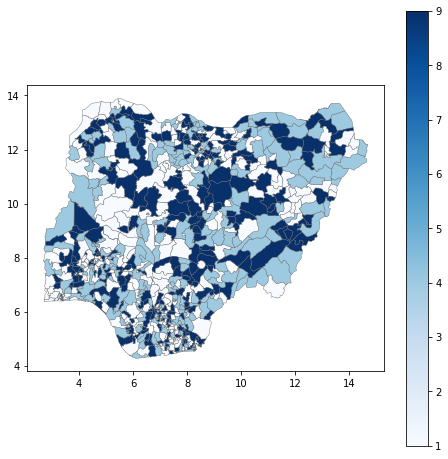

In [59]:
fig1, ax1 = plt.subplots(1, figsize=(8, 8))
lga_map_data.plot(column="rand_results", cmap="Blues", linewidth=0.4, ax=ax1, edgecolor=".4", legend=True)

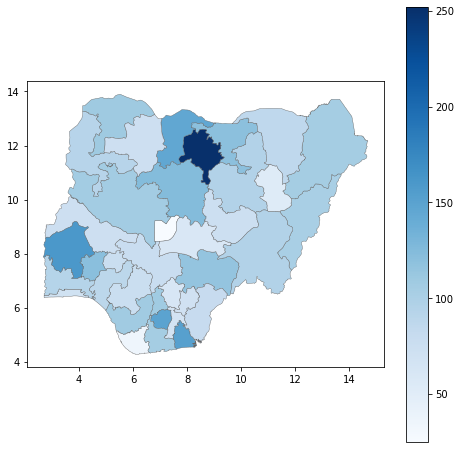

In [60]:
fig2, ax2 = plt.subplots(1, figsize=(8, 8))
state_map_data.plot(column="rand_results", cmap="Blues", linewidth=0.4, ax=ax2, edgecolor=".4", legend=True)

In [ ]:
map_json['state'] = map_json['admin1Name'].str.lower()

In [ ]:
nigeria_stats = nigeria.groupby(['state', 'sentiment']).agg({'tweet': 'count'}).unstack().reset_index()
nigeria_stats.columns = nigeria_stats.columns.map("_".join)

In [ ]:
nigeria_stats['state_'].unique()

In [ ]:
nigeria_stats['state'] = nigeria_stats['state_'].str.replace(".", "")
nigeria_stats['state'] = nigeria_stats['state'].str.replace("-", "")
nigeria_stats['state'] = nigeria_stats['state'].str.replace("_", "")
nigeria_stats['state'] = nigeria_stats['state'].str.replace("&", "")
nigeria_stats['state'] = nigeria_stats['state'].str.replace("/", "")
nigeria_stats = nigeria_stats.fillna(0)
nigeria_stats['tweets'] = nigeria_stats[['tweet_Negative','tweet_Neutral', 'tweet_Positive']].sum(axis=1)

In [ ]:
nigeria_stats['state'].unique()

In [ ]:
nigeria_stats

In [ ]:
map_data = map_json.merge(nigeria_stats, how='left', left_on='state', right_on='state')

In [ ]:
map_data['tweets'] = map_data['tweets'].fillna(0)

In [ ]:
map_data[['state','tweet_Negative','tweet_Neutral', 'tweet_Positive', 'tweets']]

#### Plotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
map_data.plot(column="tweets", cmap="Blues", linewidth=0.4, ax=ax, edgecolor=".4")

In [ ]:
map_data['tweet_Positive'] = map_data['tweet_Positive'].fillna(0)
fig, ax = plt.subplots(1, figsize=(8, 8))
map_data.plot(column="tweet_Positive", cmap="Greens", linewidth=0.8, ax=ax, edgecolor=".4")

In [ ]:
map_data['tweet_Negative'] = map_data['tweet_Negative'].fillna(0)
fig, ax = plt.subplots(1, figsize=(8, 8))
map_data.plot(column="tweet_Negative", cmap="Reds", linewidth=0.8, ax=ax, edgecolor=".4")